In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

# scRNAseq data

In [3]:
adata = sc.read_h5ad('GSE245552_scRNAseq.h5ad')
adata

AnnData object with n_obs × n_vars = 190190 × 29569
    obs: 'Sample', 'Patient', 'Tissue'
    var: 'gene_ids', 'feature_types'

## Quality Control

In [5]:
adata.layers['counts'] = adata.X.copy()

In [6]:
#Quality control
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as ‘mt’
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

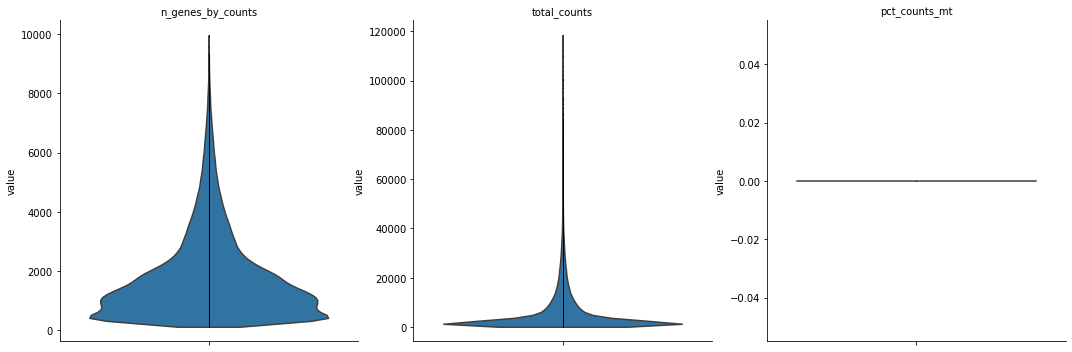

In [7]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0, multi_panel=True)

In [8]:
adata = adata[adata.obs['pct_counts_mt']<20,:].copy()
adata

AnnData object with n_obs × n_vars = 190190 × 29569
    obs: 'Sample', 'Patient', 'Tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


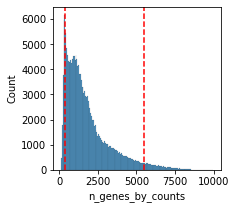

In [11]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(adata.obs['n_genes_by_counts'], kde=False)
plt.axvline(x=400,linestyle='--',color='red')
plt.axvline(x=5500,linestyle='--',color='red')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


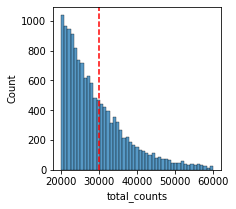

In [12]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(adata.obs['total_counts'][(adata.obs['total_counts']>20000)&(adata.obs['total_counts']<60000)], kde=False)
plt.axvline(x=30000,linestyle='--',color='red')


/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


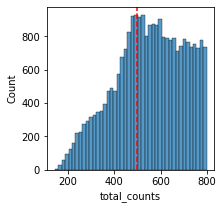

In [13]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(adata.obs['total_counts'][adata.obs['total_counts']<800], kde=False)
plt.axvline(x=500,linestyle='--',color='red')

In [14]:
adata2 = adata[(adata.obs.n_genes_by_counts > 400)&(adata.obs.n_genes_by_counts < 5500), :].copy()
adata2 = adata2[(adata2.obs.total_counts > 500)&(adata2.obs.total_counts < 30000), :].copy()

adata2

AnnData object with n_obs × n_vars = 162691 × 29569
    obs: 'Sample', 'Patient', 'Tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

## Normalization

In [15]:
sc.pp.normalize_total(adata2, target_sum=1e4)
sc.pp.log1p(adata2)

In [16]:
adata2

AnnData object with n_obs × n_vars = 162691 × 29569
    obs: 'Sample', 'Patient', 'Tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'
    layers: 'counts'

In [17]:
adata2.write_h5ad('GSE245552_scRNAseq_normalized.h5ad')

## LOY_prediction

In [18]:
import joblib

In [19]:
rf_classifier_loaded = joblib.load('9YgenesonlyFinalnew_model.pkl')
rf_classifier_loaded

RandomForestClassifier(random_state=42)

In [20]:
Ychrgenes = ['DDX3Y', 'UTY', 'KDM5D', 'USP9Y', 'ZFY', 'RPS4Y1', 'TMSB4Y', 'EIF1AY', 'NLGN4Y']

In [21]:
set(Ychrgenes).difference(adata2.var_names)

{'RPS4Y1'}

In [22]:
Ychrgenes = ['DDX3Y', 'UTY', 'KDM5D', 'USP9Y', 'ZFY', 'TMSB4Y', 'EIF1AY', 'NLGN4Y']

In [26]:
#Obtain expression matrix
X_tumor = adata2[:, Ychrgenes].X.todense()
X_tumor = pd.DataFrame(X_tumor, columns=Ychrgenes, index=adata2.obs.index)

In [33]:
X_tumor['RPS4Y1'] = 0 #Fill the missing gene with 0
X_tumor

,DDX3Y,UTY,KDM5D,USP9Y,ZFY,RPS4Y1,TMSB4Y,EIF1AY,NLGN4Y
R5218-6_CAGTAACAGGCTCTTA-1,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0
R5218-6_AAACCTGAGTACGATA-1,1.409537,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0
R5218-6_AAACCTGCACATCTTT-1,0.000000,2.415349,0.000000,0.0,0.0,0,0.0,1.807771,0.0
R5218-6_AAACCTGCACCACGTG-1,2.214233,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0
R5218-6_AAACCTGCATAAGACA-1,1.377657,0.000000,1.377657,0.0,0.0,0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
X5208-2_TTGGAACAGGGCACTA-1,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0
X5208-2_TTGGCAAAGTACGTAA-1,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0
X5208-2_TTTACTGAGAAGGTTT-1,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0
X5208-2_TTTACTGGTCATGCAT-1,0.000000,0.000000,0.000000,0.0,0.0,0,0.0,0.000000,0.0


In [30]:
Ychrgenes = ['DDX3Y', 'UTY', 'KDM5D', 'USP9Y', 'ZFY', 'RPS4Y1', 'TMSB4Y', 'EIF1AY', 'NLGN4Y']
X_tumor = X_tumor.loc[:,Ychrgenes].copy()
X_tumor

,DDX3Y,UTY,KDM5D,USP9Y,ZFY,RPS4Y1,TMSB4Y,EIF1AY,NLGN4Y
R5218-6_CAGTAACAGGCTCTTA-1,0.000000,0.000000,0.000000,0.0,0.0,NaN,0.0,0.000000,0.0
R5218-6_AAACCTGAGTACGATA-1,1.409537,0.000000,0.000000,0.0,0.0,NaN,0.0,0.000000,0.0
R5218-6_AAACCTGCACATCTTT-1,0.000000,2.415349,0.000000,0.0,0.0,NaN,0.0,1.807771,0.0
R5218-6_AAACCTGCACCACGTG-1,2.214233,0.000000,0.000000,0.0,0.0,NaN,0.0,0.000000,0.0
R5218-6_AAACCTGCATAAGACA-1,1.377657,0.000000,1.377657,0.0,0.0,NaN,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
X5208-2_TTGGAACAGGGCACTA-1,0.000000,0.000000,0.000000,0.0,0.0,NaN,0.0,0.000000,0.0
X5208-2_TTGGCAAAGTACGTAA-1,0.000000,0.000000,0.000000,0.0,0.0,NaN,0.0,0.000000,0.0
X5208-2_TTTACTGAGAAGGTTT-1,0.000000,0.000000,0.000000,0.0,0.0,NaN,0.0,0.000000,0.0
X5208-2_TTTACTGGTCATGCAT-1,0.000000,0.000000,0.000000,0.0,0.0,NaN,0.0,0.000000,0.0


In [36]:
#Get results and renaming
tumor_predictions = rf_classifier_loaded.predict(X_tumor)
adata2.obs["RL_Prediction_Only9genes"]=tumor_predictions.copy()
adata2.obs["RL_Prediction_Only9genes"].value_counts()
adata2.obs['LOY'] = adata2.obs["RL_Prediction_Only9genes"].map({0: 'WTY_SCR', 1: 'LOY_SCR'})
adata2.obs['LOY'].value_counts()

LOY
LOY_SCR    99542
WTY_SCR    63149
Name: count, dtype: int64

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored

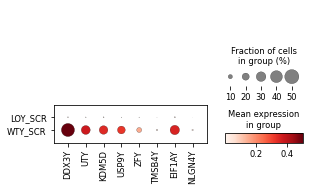

In [40]:
#Model check
Ychrgenes = ['DDX3Y', 'UTY', 'KDM5D', 'USP9Y', 'ZFY', 'TMSB4Y', 'EIF1AY', 'NLGN4Y']
sc.pl.dotplot(adata2, Ychrgenes, use_raw=False,groupby='LOY',vmax=0.5)

In [111]:
#Map sample names
Samples = adata2.obs['Sample'].unique().tolist()
Sample_mapp = {
 'Pt01_T1':'Pt01_PT',
 'Pt01_T2':'Pt01_LM',
 'Pt02_T1':'Pt02_PT',
 'Pt02_T2':'Pt02_LM',
 'Pt03_T1':'Pt03_PT',
 'Pt03_T2':'Pt03_LM',
 'Pt04_T1':'Pt04_PT',
 'Pt04_T2':'Pt04_LM',
 'Pt05_T1':'Pt05_PT',
 'Pt05_T2':'Pt05_LM1',
 'Pt05_T3':'Pt05_LM2',
 'Pt06_T1':'Pt06_PT',
 'Pt06_T2':'Pt06_LM1',
 'Pt06_T3':'Pt06_LM2',
 'Pt07_T1':'Pt07_PT',
 'Pt07_T2':'Pt07_LM',
 'Pt08_T1':'Pt08_PT1',
 'Pt08_T2':'Pt08_PT2',
 'Pt08_T3':'Pt08_LM1',
 'Pt08_T4':'Pt08_LM2',
 'Pt09_T1':'Pt10_PT',
 'Pt10_T1':'Pt10_PT',
 'Pt10_T2':'Pt10_LM',
 'Pt11_T1':'Pt11_PT',
 'Pt11_T2':'Pt11_LM',
 'Pt13_T1':'Pt13_PT',
 'Pt13_Z1':'Pt13_CAT',
 'Pt15_T1':'Pt15_PT',
 'Pt15_T2':'Pt15_LM',
 'Pt15_Z1':'Pt15_CAT',
 'Pt16_T1':'Pt16_LM',
 'Pt16_Z1':'Pt16_LAT',
 'Pt17_T1':'Pt17_PT',
 'Pt17_T2':'Pt17_LM',
 'Pt17_Z1':'Pt17_CAT',
 'Pt18_T1':'Pt18_PT',
 'Pt18_T2':'Pt18_LM',
 'Pt18_Z1':'Pt18_CAT',
 'Pt18_Z2':'Pt18_LAT'
}
adata2.obs['Sample2'] = adata2.obs['Sample'].map(Sample_mapp)

In [117]:
#Calculate LOY fraction in each sample
LOY_cnt = adata2.obs.groupby(['Sample2','LOY']).size().reset_index(name='count')
LOY_cnt = LOY_cnt.pivot_table(index=['Sample2'],columns='LOY',values='count')
rowsum = LOY_cnt.sum(axis=1)
LOY_fract = LOY_cnt.div(rowsum,axis='rows')
LOY_fract['patient'] = [ind[0:4] for ind in LOY_fract.index]
LOY_fract['Sample'] = [ind[5:7] for ind in LOY_fract.index]
LOY_fract['Patient_Sample'] = LOY_fract['patient']+'_'+LOY_fract['Sample']

# Combine with WES data & bulk RNAseq data

In [13]:
Bulk_Res = pd.read_csv('GSE255165_WESChrscores_RNAYchrS.csv',index_col=0)
Bulk_Res['Sample'] = [samp[5:7] for samp in Bulk_Res.index]
Bulk_Res['Patient_Sample'] = Bulk_Res['patient']+'_'+Bulk_Res['Sample']
Bulk_Res = pd.DataFrame(Bulk_Res[['chrY','YchrS']].groupby(Bulk_Res['Patient_Sample']).mean())

In [15]:
LOY_fract = pd.DataFrame(LOY_fract[['LOY_SCR']].groupby(LOY_fract['Patient_Sample']).mean())
data2 = pd.concat([Bulk_Res, LOY_fract],axis=1)
data2['Sample'] = [ind.split('_')[1] for ind in data2.index]
data2.to_csv('GSE255165_3_method_combine.csv')